In [100]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [101]:
from matplotlib.colors import ListedColormap

# Colormap
colors = ['black', 'red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'cyan', 'magenta']
cmap = ListedColormap(colors)

In [138]:
def quickplot(file_name):
    # Load the JSON file into a dictionary
    with open(file_name) as train_file:
        dict_train = json.load(train_file)

    # Normalize the JSON data to ensure all arrays are of the same length
    puzzle = pd.json_normalize(dict_train)

    # Reset the index for better readability
    puzzle.reset_index(drop=True, inplace=True)

    num_train = len(puzzle.train[0])
    num_test = len(puzzle.test[0])

    fig, axes = plt.subplots(num_train + num_test, 2, figsize=(10, 10))
    for i in range(num_train):
        axes[i, 0].imshow(np.array(puzzle.train[0][i]['input']), cmap=cmap, vmin=0, vmax=len(colors)-1)
        axes[i, 0].set_title(f'Train {i + 1} Input')
        axes[i, 1].imshow(np.array(puzzle.train[0][i]['output']), cmap=cmap, vmin=0, vmax=len(colors)-1)
        axes[i, 1].set_title(f'Train {i + 1} Output')
    
    for i in range(num_test):
        axes[i + num_train, 0].imshow(np.array(puzzle.test[0][i]['input']), cmap=cmap, vmin=0, vmax=len(colors)-1)
        axes[i + num_train, 0].set_title(f'Test {i + 1} Input')
        axes[i + num_train, 1].imshow(np.array(puzzle.test[0][i]['output']), cmap=cmap, vmin=0, vmax=len(colors)-1)
        axes[i + num_train, 1].set_title(f'Test {i + 1} Output')

    plt.tight_layout()

In [139]:
train_list = []
with open('data/training.txt') as train_file:
    for line in train_file:
        line = line.strip()
        train_list.append(line)

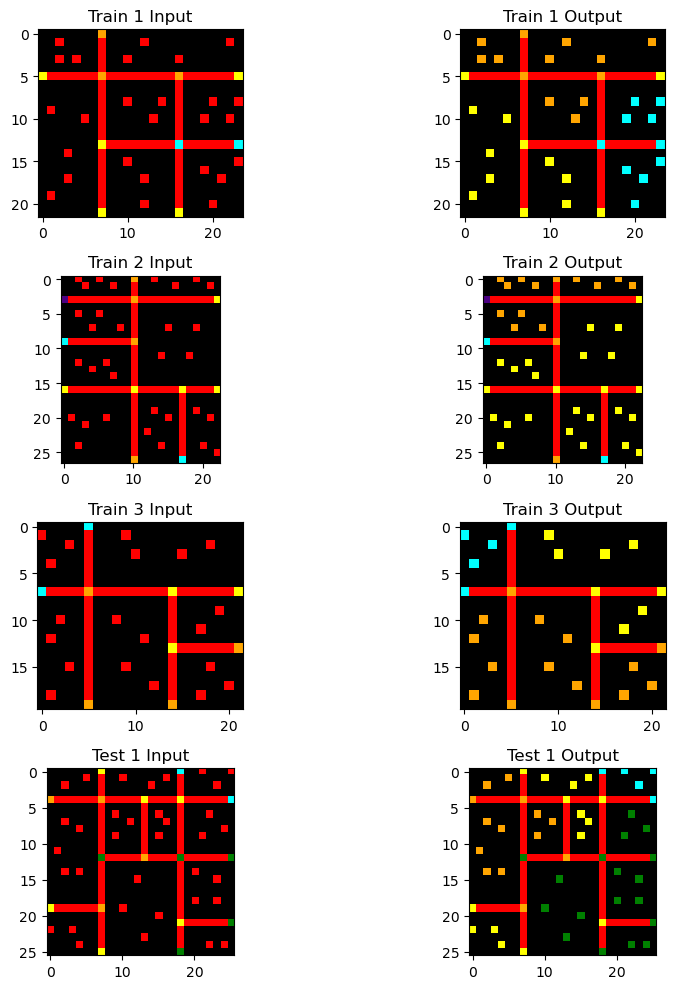

In [146]:
example = np.random.choice(train_list)
quickplot('data/training/' + example + '.json')